# Linear Regression Assignment : Prediction of demand for shared bikes

# Business and Data Understanding

### BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic 
### BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19
### They want to stand out from other service providers and make huge profits.

# Conditions for Understand/Predict

    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

# Result Expected

    - model the demand for shared bikes with the available independent variables
    - how exactly each variable has the demands vary with different features


# Few Data Dictionary reference
     instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Data Understanding

In [1]:
# To remove Warnings, adding the below libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
### Importing Pandas librries
import numpy as np
import pandas as pd

### Importing the libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the libraries for Linear Regression Prediction
import sklearn
from sklearn.model_selection import train_test_split

#### For scaling
from sklearn.preprocessing import MinMaxScaler

#### Stats model
import statsmodels.api as sm

#### Libraries for VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### For model Evaluation
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [3]:
### Reading data from the csv file
bikedf = pd.read_csv('day.csv')

In [4]:
### Verifying the head of the data
bikedf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Data loaded successfully. Lets start understanding the columns and the value counts

In [5]:
bikedf.shape

(730, 16)

In [6]:
### Checking for the null values in the columns
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikedf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### We have confirmed there is no null fields using info and isnull().sum() functions

In [8]:
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [9]:
### instant is just the number sequence for the data. There is no relation to the data, hence droppping it
bikedf = bikedf.drop(['instant'], axis = 1)
bikedf.shape

(730, 15)

In [10]:
### Since the 'dteday'field provides the year and month details, we have the same columns in the dataset. so removing it
bikedf = bikedf.drop(['dteday'], axis = 1)
bikedf.shape

(730, 14)

In [11]:
### The Fields 'temp' and 'atemp' represents the temperature, 
### it will not be of use to be seperate fields, it will be highly correlated. Hence removing one of it
bikedf = bikedf.drop(['atemp'], axis = 1)
bikedf.shape

(730, 13)

In [12]:
### The fields 'casual' and 'registered' together added provide the target field 'cnt' value,
### it will not be good candidate for the prediction data. Hence removing these 2 fields
bikedf = bikedf.drop(['casual','registered'], axis = 1)
bikedf.shape


(730, 11)

In [13]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Now all the unnecessary columns are removed. Lets check the data again for analysis.

## Data Visualisation

#### Lets first plot pair plot for all the variables in the bikedf data set

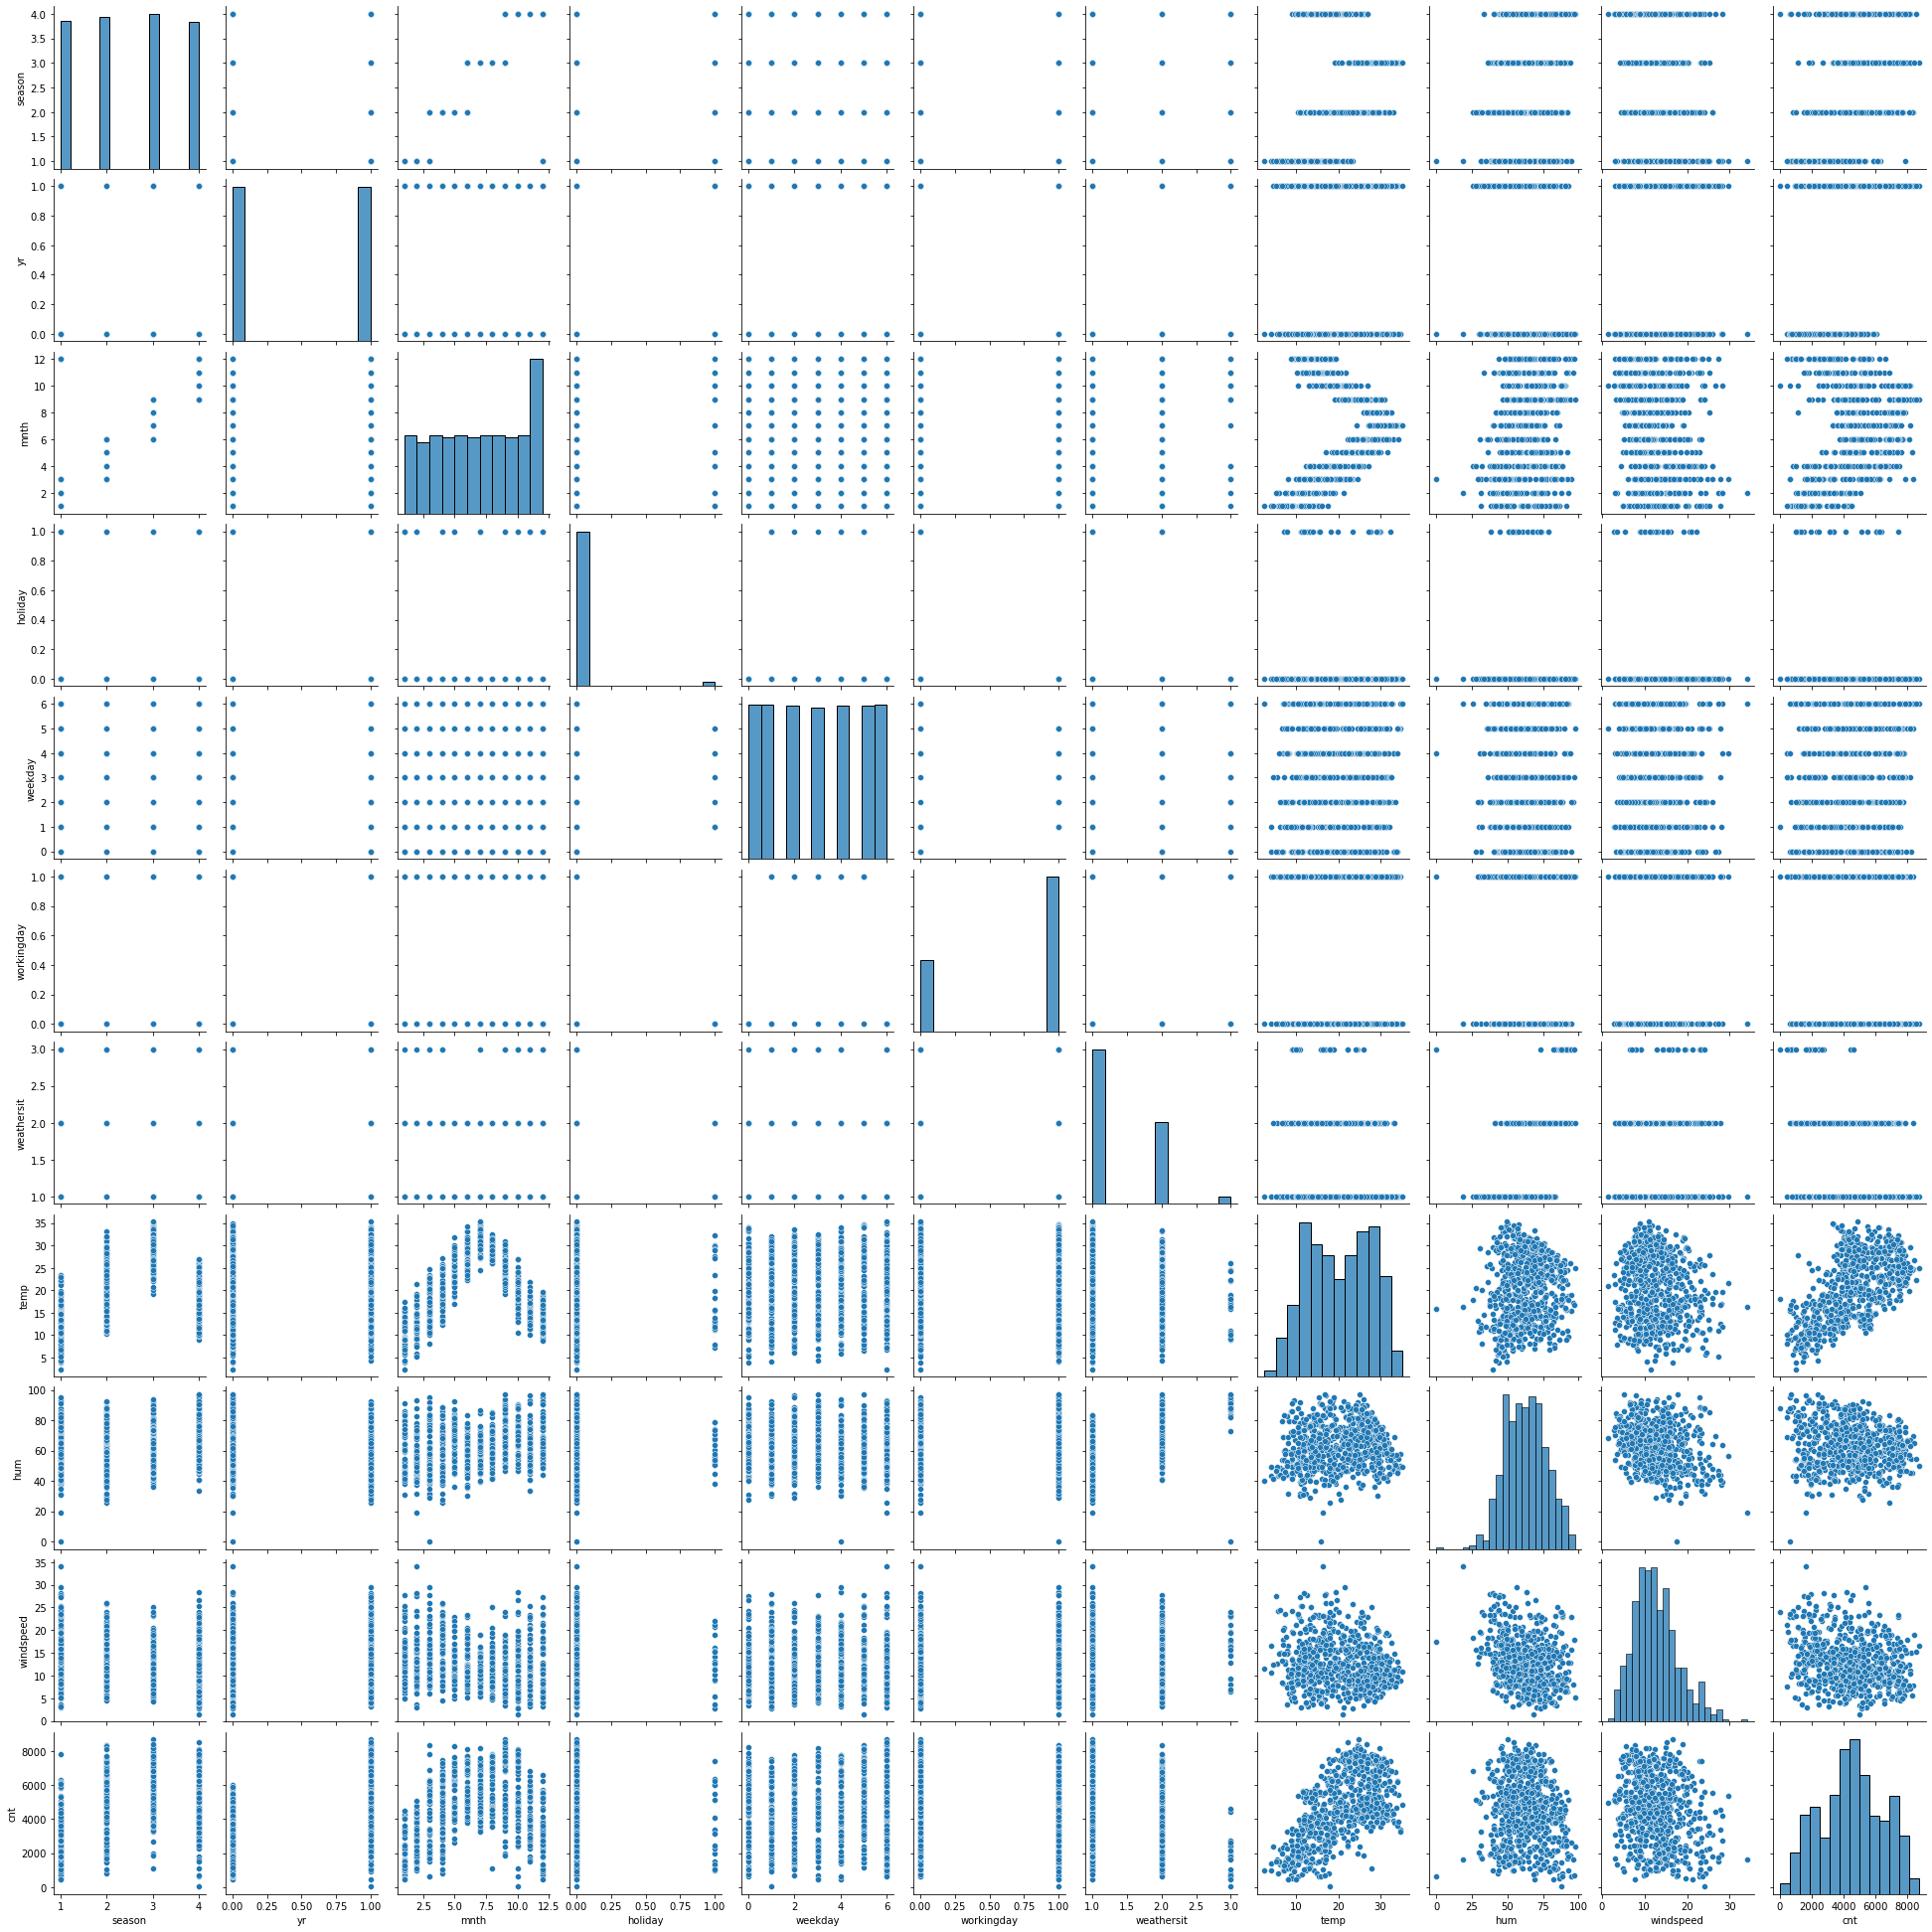

In [14]:
sns.pairplot(bikedf)
plt.show()

#### We can see there is some sort of positive correlation between cnt and temp. ie some of the variance in cnt is explained by temp. Also little negative correlation with windspeed and hum. Lets check this in different pair plot for numerical and categorical values

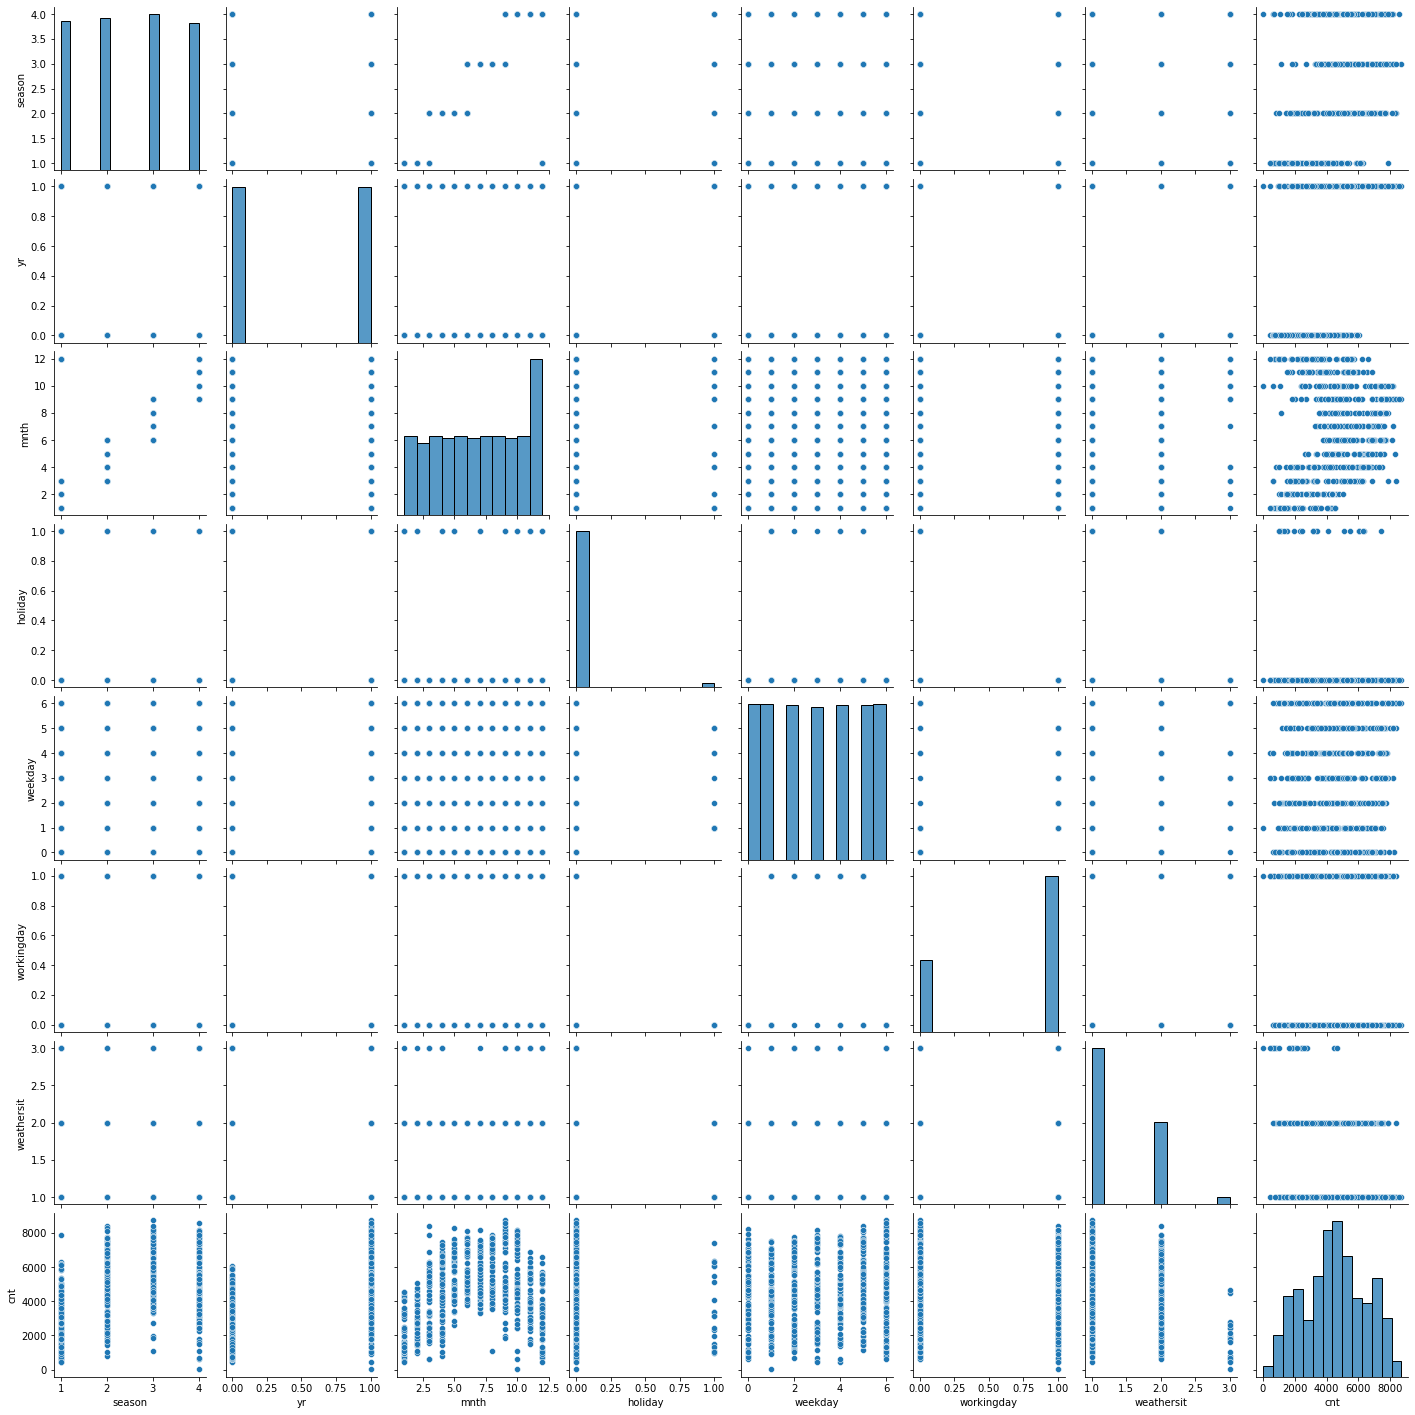

In [15]:
### Categorical value with the target variable
sns.pairplot(data=bikedf,vars=('season','yr','mnth','holiday','weekday', 'workingday','weathersit','cnt'))
plt.show()

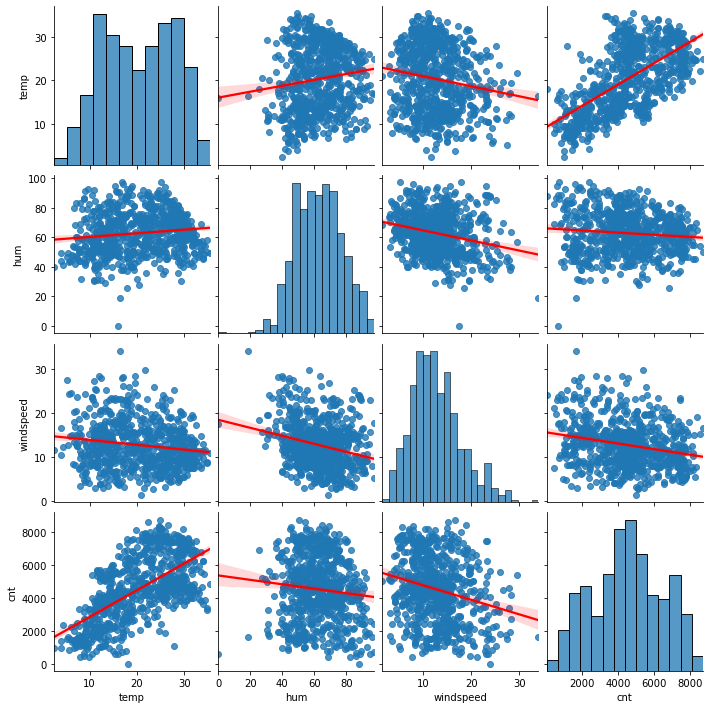

In [16]:
### Numerical variable in pair plot
sns.pairplot(data=bikedf,vars=('temp', 'hum','windspeed','cnt'),kind='reg',plot_kws={'line_kws':{'color':'red'}})
plt.show()

### We can see that temp is more correlated with the cnt than any other fields

#### Lets visualize the categorical value by bar and box plots
#### Lets check the field season and its value 
#### The given season values are 1:spring, 2:summer, 3:fall, 4:winter

In [17]:
bikedf.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

#### We can see that winter has less counts but comparabily not much of difference can be seen. But the median distribution needs to be checked

In [18]:
### Lets check for the holiday field
bikedf.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

#### Holiday definition given as whether a day is a holiday or not.
##### 0 - No, 1 - Yes -> This signifies, many school and office people are using it

In [19]:
bikedf.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

#### We can see lot of data on working day.


In [20]:
### Year Verification
bikedf.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [21]:
### Month Verification
bikedf.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

####  As per the year and month analysis, we can see that there is record for every day in a year

#### Lets check for the median value plotted for season and cnt

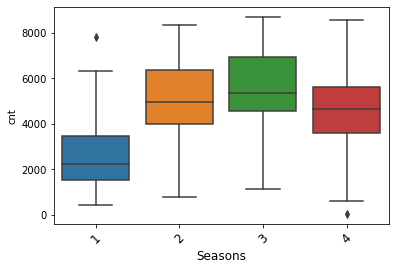

In [22]:
sns.boxplot(data=bikedf,x='season',y='cnt')
plt.xlabel('Seasons', size=12)
plt.xticks(size=12, rotation=45)
plt.show()

#### We can notice that other than spring all other seasons values are within the range of 4000 to 6000 cnt value
#### Instead of one by one categorical Variable to verify, lets plot in single one

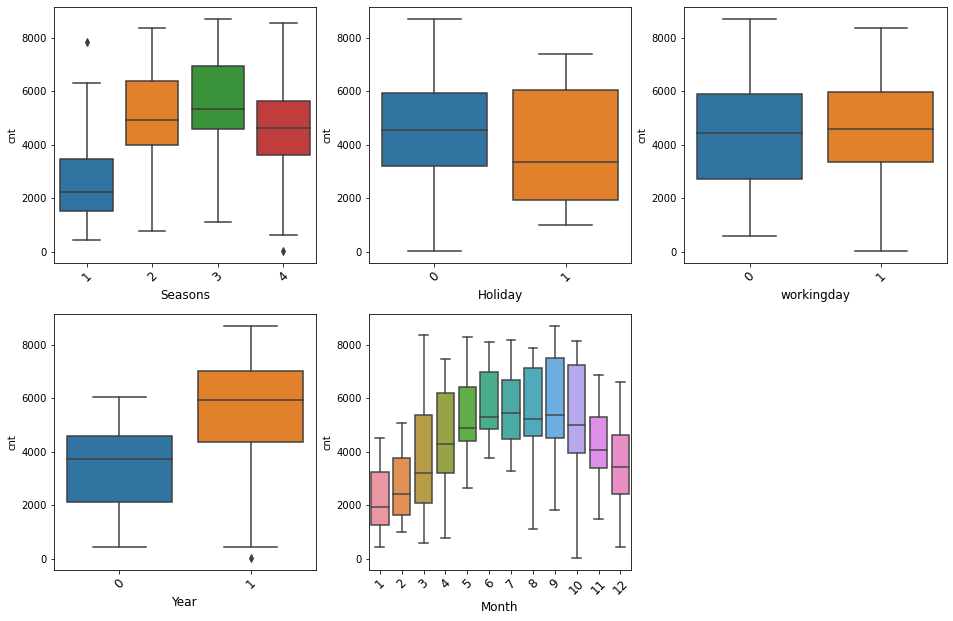

In [23]:
plt.figure(figsize=(16,16))
plt.subplot(3, 3, 1)
sns.boxplot(data=bikedf,x='season',y='cnt')
plt.xlabel('Seasons', size=12)
plt.xticks(size=12, rotation=45)
plt.subplot(3, 3, 2)
sns.boxplot(data=bikedf,x='holiday',y='cnt')
plt.xlabel('Holiday', size=12)
plt.xticks(size=12, rotation=45)
plt.subplot(3, 3, 3)
sns.boxplot(data=bikedf,x='workingday',y='cnt')
plt.xlabel('workingday', size=12)
plt.xticks(size=12, rotation=45)
plt.subplot(3, 3, 4)
sns.boxplot(data=bikedf,x='yr',y='cnt')
plt.xlabel('Year', size=12)
plt.xticks(size=12, rotation=45)
plt.subplot(3, 3, 5)
sns.boxplot(data=bikedf,x='mnth',y='cnt')
plt.xlabel('Month', size=12)
plt.xticks(size=12, rotation=45)
plt.show()

#### Since the month column is conjested, lets view few more fields as seperate map

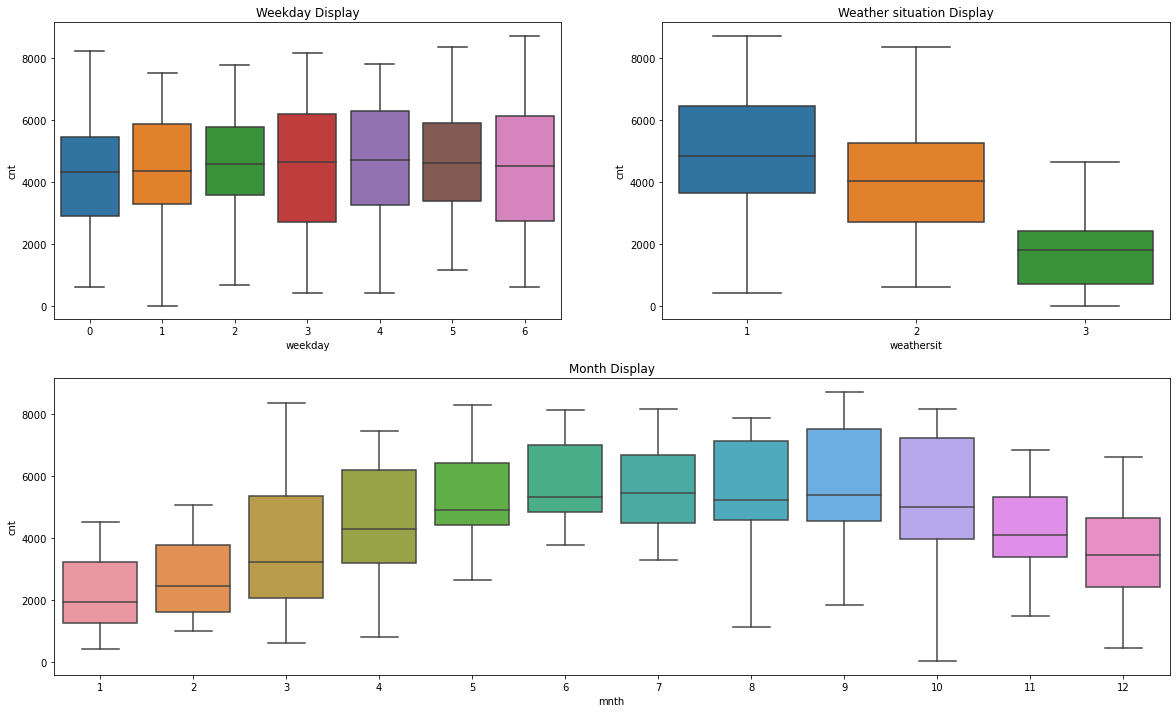

In [24]:
plt.figure(figsize=(20, 12))

plt.subplot(2,1,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedf)
plt.title('Month Display', size=12)
plt.subplot(2,2,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedf)
plt.title('Weekday Display', size=12)
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedf)
plt.title('Weather situation Display', size=12)
plt.show()

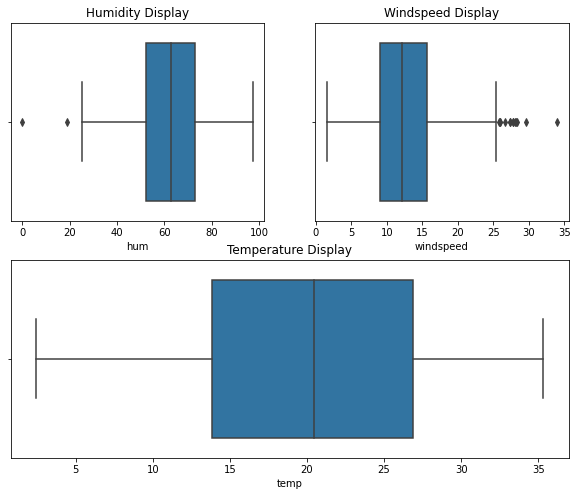

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,2)
sns.boxplot(x = 'temp', data = bikedf)
plt.title('Temperature Display', size=12)
plt.subplot(2,2,1)
sns.boxplot(x = 'hum', data = bikedf)
plt.title('Humidity Display', size=12)
plt.subplot(2,2,2)
sns.boxplot(x = 'windspeed', data = bikedf)
plt.title('Windspeed Display', size=12)
plt.show()

### We can notice some outliers in the humidity and windspeed fields

#### Lets check for the continuous variables distribution

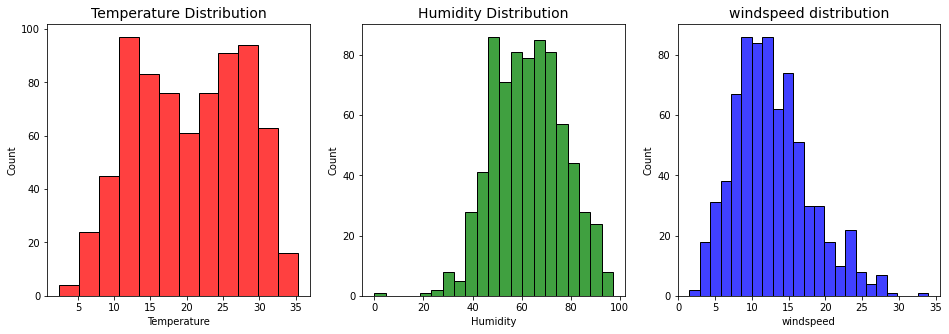

In [26]:
plt.figure(figsize=(16,5))
plt.subplot(1, 3, 1)
sns.histplot(bikedf.temp, color='r')
plt.xlabel("Temperature")
plt.title("Temperature Distribution", fontsize=14)

plt.subplot(1, 3, 2)
sns.histplot(bikedf.hum, color='g')
plt.xlabel("Humidity")
plt.title("Humidity Distribution", fontsize=14)

plt.subplot(1, 3, 3)
sns.histplot(bikedf.windspeed, color='b')
plt.xlabel("windspeed")
plt.title("windspeed distribution", fontsize=14)
plt.show()

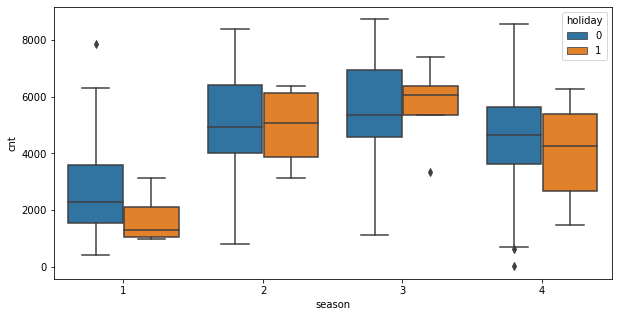

In [27]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'holiday', data = bikedf)
plt.show()

## Data Preparation

##### Most of the values with the 'Yes' or 'No' are already displayed in Binary values(0 and 1). There is no need for conversion for binary fields.
##### The field names are 'yr', 'holiday', 'working day'

#### Dummy Variables
#### Few columns like 'Season', 'mnth', 'weekday', 'weather sit' are categorical values and needs dummy variables

In [28]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [29]:
bikedf.shape

(730, 11)

In [30]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons_d'
# drop the first column from seasons_d df using 'drop_first = True'
seasons_d = pd.get_dummies(bikedf['season'], drop_first = True)
seasons_d = seasons_d.rename(columns = {1:"season_spring", 2:"season_summer", 3:"season_fall", 4:"season_winter"})
seasons_d.head()

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [31]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_d'
# drop the first column from mnth_d df using 'drop_first = True'
mnth_d = pd.get_dummies(bikedf['mnth'], drop_first = True)
mnth_d = mnth_d.rename(columns = {1:"mnth_Jan", 2:"mnth_Feb", 3:"mnth_Mar", 4:"mnth_Apr",
                                 5:"mnth_May",6:"mnth_June",7:"mnth_July",8:"mnth_Aug",9:"mnth_Sep",
                                 10:"mnth_Oct",11:"mnth_Nov",12:"mnth_Dec"})
mnth_d.head()

,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sep,mnth_Oct,mnth_Nov,mnth_Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_d'
# drop the first column from weekday_d df using 'drop_first = True'
weekday_d = pd.get_dummies(bikedf['weekday'], drop_first = True)
weekday_d = weekday_d.rename(columns = {0:"day_Mon", 1:"day_Tue", 2:"day_Wed", 3:"day_Thur",
                                 4:"day_Fri",5:"day_Sat",6:"day_Sun"})
weekday_d.head()

,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [33]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_d'
# drop the first column from weathersit_d df using 'drop_first = True'
weathersit_d = pd.get_dummies(bikedf['weathersit'], drop_first = True)
weathersit_d = weathersit_d.rename(columns = {1:"W_Clear", 2:"W_Mist", 3:"W_LightRain"})
weathersit_d.head()

,W_Mist,W_LightRain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [34]:
#### Now adding the dummy variables as part of the bikedf dataframe
bikedf = pd.concat([bikedf, seasons_d,mnth_d,weekday_d,weathersit_d], axis = 1)

In [35]:
bikedf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,0,0,0


In [36]:
bikedf.shape

(730, 33)

In [37]:
# Lets drop 'season','mnth' columns as we have created the dummies for it

bikedf.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [38]:
bikedf.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
bikedf.shape

(730, 29)

In [40]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_summer  730 non-null    uint8  
 8   season_fall    730 non-null    uint8  
 9   season_winter  730 non-null    uint8  
 10  mnth_Feb       730 non-null    uint8  
 11  mnth_Mar       730 non-null    uint8  
 12  mnth_Apr       730 non-null    uint8  
 13  mnth_May       730 non-null    uint8  
 14  mnth_June      730 non-null    uint8  
 15  mnth_July      730 non-null    uint8  
 16  mnth_Aug       730 non-null    uint8  
 17  mnth_Sep       730 non-null    uint8  
 18  mnth_Oct  

In [41]:
# Converting the categorical columns to numeric values similar to other dummy variable fields
bikedf[['yr','holiday','workingday']]= bikedf[['yr','holiday','workingday']].astype('uint8')
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    uint8  
 1   holiday        730 non-null    uint8  
 2   workingday     730 non-null    uint8  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_summer  730 non-null    uint8  
 8   season_fall    730 non-null    uint8  
 9   season_winter  730 non-null    uint8  
 10  mnth_Feb       730 non-null    uint8  
 11  mnth_Mar       730 non-null    uint8  
 12  mnth_Apr       730 non-null    uint8  
 13  mnth_May       730 non-null    uint8  
 14  mnth_June      730 non-null    uint8  
 15  mnth_July      730 non-null    uint8  
 16  mnth_Aug       730 non-null    uint8  
 17  mnth_Sep       730 non-null    uint8  
 18  mnth_Oct  

#### All the data is cleared and the dummies are created for each required variables

## Splitting the Data into Training and Testing Sets

In [42]:
# The train and test data set is splitted with 70% data as train set and 30% data as the test set
np.random.seed(0)
bike_train, bike_test = train_test_split(bikedf, train_size = 0.7, test_size = 0.3, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


#### Now that the data is split, lets perform scaling of the data

### Scaling
##### We need to do scaling to rescale the variables to have a comparable scale. Its better to perform scaling because we dont want to have the coefficients be very large or very small as compared to the other coefficients

In [43]:
### Instantiate an object
scaler = MinMaxScaler()

In [44]:
# since we need to rescale the fields, we can apply to the other numeric fields having values other than fields having 0 and 1
# Binary Fields and the dummy fields doesnt need any type of conversion since it having only 0 and 1 as value
# Creating a list of the numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
### Fit the data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [45]:
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [46]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Now we can see that all the fields are in the range of 0 to 1. The min value is 0 and max value is 1 for all the variable values because we used fit_transform()

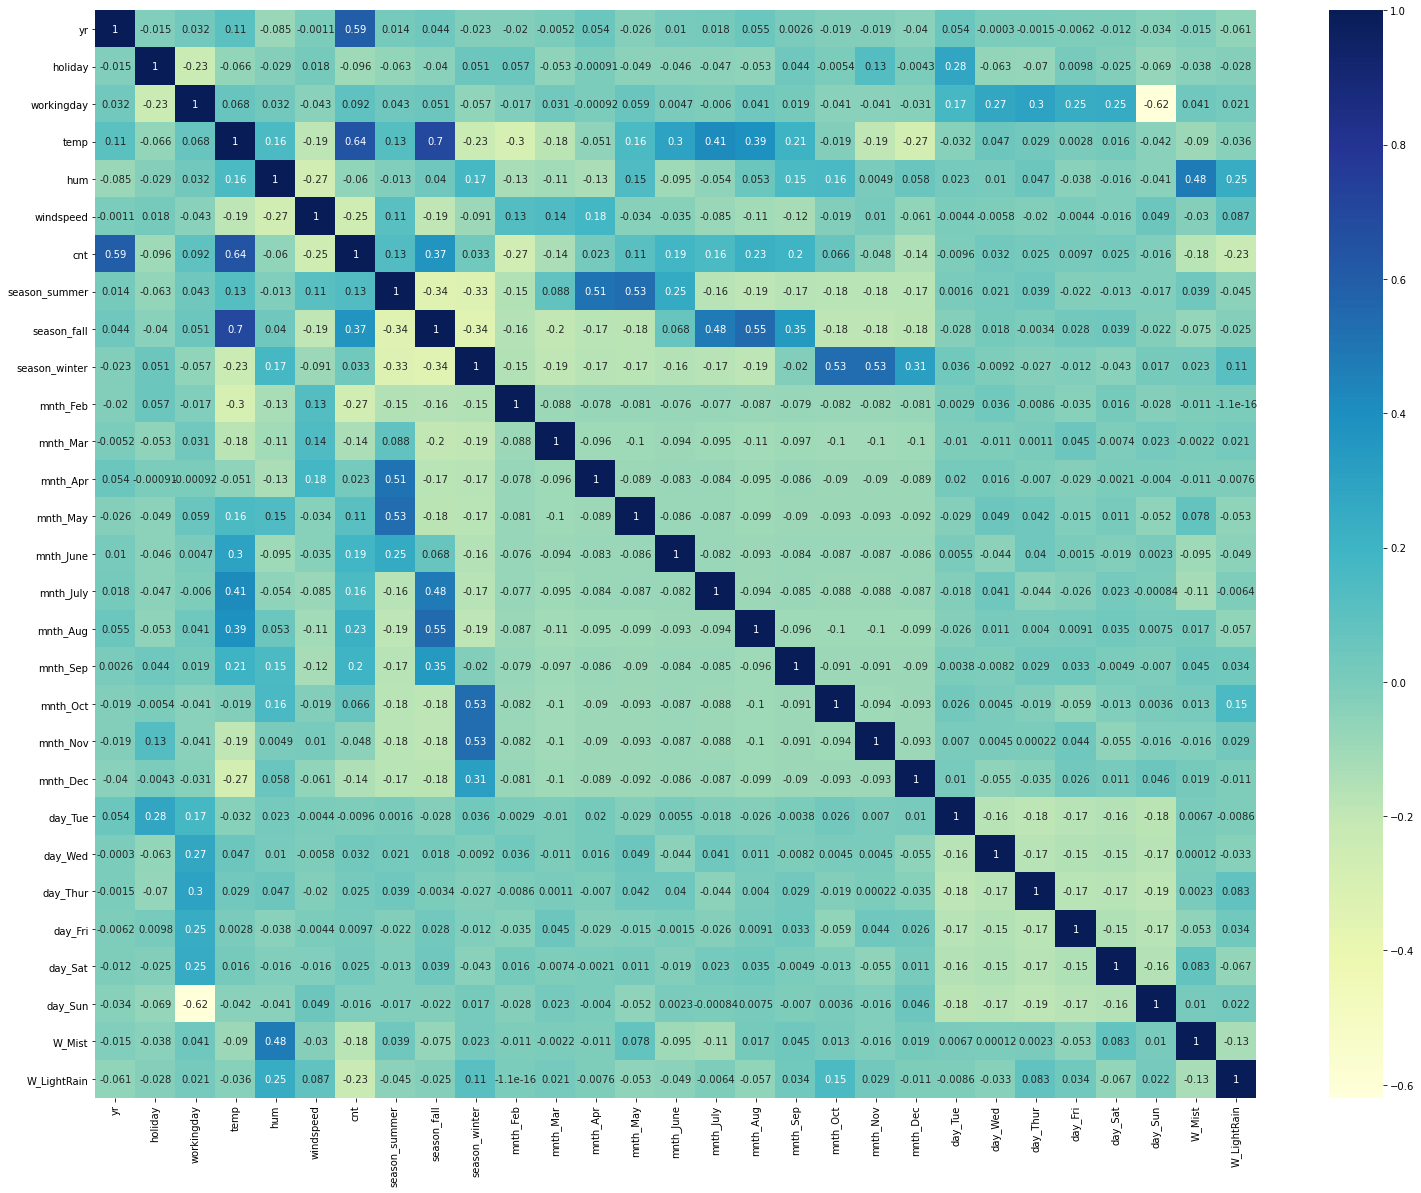

In [47]:
## Now we have to check the correlation of the fields to check which fields are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### We can see that cnt is highly correlated to the feature temp of 0.64 followed by yr data of 0.59. Hence taking those 2 features and plotting scatter plot.
#### Also we can notice that temp and season fall are highly correlated, it might lead to variance. Lets check this in analysis

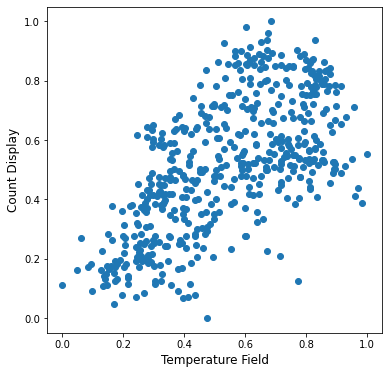

In [48]:
plt.figure(figsize=[6,6])
plt.scatter(x='temp', y='cnt',data=bike_train)
plt.xlabel('Temperature Field',size=12)
plt.ylabel('Count Display', size=12)
plt.show()

## Model Building

#### Now that the data is split, Lets do the model building by training the system

In [49]:
### Taking the target variable in y_train and the remaining fields in the X_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [50]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [51]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_Feb,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### There are different ways of building a model either performed using Manual Elimination model or RFE (Recursive Feature Elimination).
### Here we consider building our model using RFE


## Building the model using RFE

In [52]:
### Instantiate an object for linear regression
lm = LinearRegression()

lm.fit(X_train, y_train)

# running RFE with Top 15 records fetched automatically
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [53]:
#### Listing the columns along with the ranking and support
#### Ranking provides with the order of the features to be considered for the modelling
#### Support provides True or False value for considering the features for the modelling
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Mar', False, 2),
 ('mnth_Apr', False, 4),
 ('mnth_May', False, 3),
 ('mnth_June', False, 5),
 ('mnth_July', False, 9),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 11),
 ('mnth_Dec', False, 14),
 ('day_Tue', False, 7),
 ('day_Wed', False, 8),
 ('day_Thur', False, 12),
 ('day_Fri', False, 13),
 ('day_Sat', False, 10),
 ('day_Sun', True, 1),
 ('W_Mist', True, 1),
 ('W_LightRain', True, 1)]

#### From the execution, we can see that many fields has different ranking. For our analysis, we will use only Rank 1 variables

In [54]:
#### Checking the columns which has the support value as true.
#### The columns whichever is having supported as True will be taken for RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'mnth_Aug', 'mnth_Sep',
       'mnth_Oct', 'day_Sun', 'W_Mist', 'W_LightRain'],
      dtype='object')

In [55]:
#### Remove the columns from the X_train whichever has False value for Support
X_train.columns[~rfe.support_]

Index(['mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_May', 'mnth_June',
       'mnth_July', 'mnth_Nov', 'mnth_Dec', 'day_Tue', 'day_Wed', 'day_Thur',
       'day_Fri', 'day_Sat'],
      dtype='object')

In [56]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
# Adding a constant variable using add constant from stats models library

X_train_new = sm.add_constant(X_train_rfe)

In [58]:
# Running the linear model
lin_model = sm.OLS(y_train,X_train_new).fit()   

In [59]:
#The summary of the linear model is printed for verification
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.89e-191
Time:                        10:22:53   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1950      0.029      6.791

#### R2 value is 84.9%
#### Adjusted R2 has the value as 84.4% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for season_fall column alone displayed with the value as 0.179 which is higher than 0.05
#### Hence manual removal of that feature should be done

In [60]:
###removing the holiday feature from the list
X_train_new = X_train_rfe.drop(["season_fall"], axis = 1)

In [61]:
### adding constant
X_train_lm = sm.add_constant(X_train_new)

In [62]:
# Running the linear regression model
lin_model = sm.OLS(y_train,X_train_lm).fit()   

In [63]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.24e-192
Time:                        10:22:54   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1945      0.029      6.770

#### R2 value is 84.8%
#### Adjusted R2 has the value as 84.4% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for all the columns are less than 0.05
#### Hence summary looks fine. Lets check the VIF fields as well

In [64]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct',
       'day_Sun', 'W_Mist', 'W_LightRain'],
      dtype='object')

In [65]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_winter,2.27
12,W_Mist,2.14
0,yr,2.03
11,day_Sun,1.90
6,season_summer,1.83
10,mnth_Oct,1.62


#### VIF for hum field is more, we can remove this field

In [66]:
### Lets drop the const variable and create a model and run the linear reg model
X_train_new = X_train_new.drop(['hum'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()

In [67]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.16e-189
Time:                        10:22:54   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0945      0.019      4.961

#### R2 value is 84.2%
#### Adjusted R2 has the value as 83.8% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for all columns are less than 0.05
#### Hence moving to the VIF verification

In [68]:
X_train_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Sep', 'mnth_Oct', 'day_Sun',
       'W_Mist', 'W_LightRain'],
      dtype='object')

In [69]:
### VIF Verification for all the fields
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_winter,2.02
5,season_summer,1.82
10,day_Sun,1.77
9,mnth_Oct,1.62
7,mnth_Aug,1.59
11,W_Mist,1.54


#### We can notice temp, temp has the highest VIF. However, we can seen there was high corrleation between the temp and cnt field in our bivariate analysis. Hence we will remove the next highest VIF value, since there might be other variables which have caused the VIF of temp to be higher

In [70]:
### Lets drop the working Day variable and create a model and run the linear reg model
X_train_new = X_train_new.drop(['workingday'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()

In [71]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.26e-186
Time:                        10:22:55   Log-Likelihood:                 500.30
No. Observations:                 510   AIC:                            -974.6
Df Residuals:                     497   BIC:                            -919.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1324      0.017      7.859

#### Noticing that there is no much difference between R2 and adj R2 with the previous execution, lets consider our idea of removing the field 'working day' is right
#### R2 value is 83.6%
#### Adjusted R2 has the value as 83.3% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for mnth_Oct is higher than 0.05
#### Hence removing the field

In [72]:
### Lets drop the mnth_Oct variable and create a model and run the linear reg model
X_train_new = X_train_new.drop(['mnth_Oct'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()

In [73]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.28e-187
Time:                        10:22:55   Log-Likelihood:                 498.36
No. Observations:                 510   AIC:                            -972.7
Df Residuals:                     498   BIC:                            -921.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1281      0.017      7.649

#### R2 value is 83.5%
#### Adjusted R2 has the value as 83.2% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for all columns are less than 0.05
#### Hence moving to VIF verification

In [74]:
### VIF Verification for all the fields
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.03
3,windspeed,3.17
0,yr,2.00
4,season_summer,1.81
6,mnth_Aug,1.58
5,season_winter,1.49
9,W_Mist,1.49
7,mnth_Sep,1.31
8,day_Sun,1.18
10,W_LightRain,1.08


#### Again temp column shows higheer VIF.. We might need to remove one more column from the analysis set. 
#### We will remove the mnth_Aug column and check again. Eventhough the pvalue and VIF is within the range, considering to remove it and verify

In [75]:
### Lets drop the mnth_Aug variable and create a model and run the linear reg model
X_train_new = X_train_new.drop(['mnth_Aug'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()

In [76]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.35e-186
Time:                        10:22:56   Log-Likelihood:                 493.13
No. Observations:                 510   AIC:                            -964.3
Df Residuals:                     499   BIC:                            -917.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1232      0.017      7.319

#### R2 value is 83.2%
#### Adjusted R2 has the value as 82.8% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for day_Sun column is greater than 0.05
#### Hence removing the field

In [77]:
### Lets drop the day_Sun variable and create a model and run the linear reg model
X_train_new = X_train_new.drop(['day_Sun'], axis=1)
X_train_lm = sm.add_constant(X_train_new)
lin_model = sm.OLS(y_train,X_train_lm).fit()

In [78]:
#The summary of our linear model
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.37e-186
Time:                        10:22:56   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1264      0.017      7.541

#### R2 value is 83.1%
#### Adjusted R2 has the value as 82.8% which is almost similar to R2. Not much difference
#### Prob(F-Stats) is less than 0
#### p-value for all columns are less than 0.05
#### Hence moving to VIF

In [79]:
### VIF Verification for all the fields
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,season_summer,1.56
7,W_Mist,1.48
5,season_winter,1.38
6,mnth_Sep,1.20
8,W_LightRain,1.08
1,holiday,1.03


### The VIF and pvalues looks fine. hence moving to residual analysis and prediction

In [80]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Sep', 'W_Mist', 'W_LightRain'],
      dtype='object')

### Residuals Analysis

In [81]:
y_train_pred = lin_model.predict(X_train_lm)


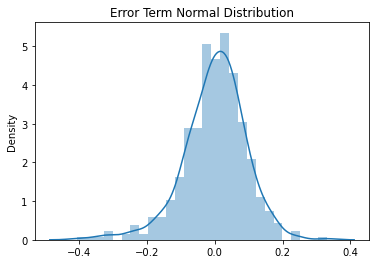

In [82]:
res = y_train - y_train_pred

sns.distplot(res)
plt.title('Error Term Normal Distribution')
plt.show()

### We can see that the error terms are normally distributed with the mean as 0

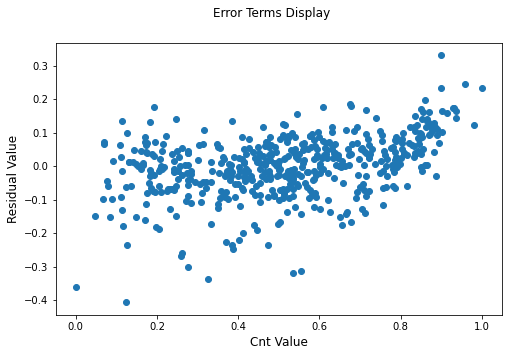

In [83]:
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms Display', fontsize=12)
plt.xlabel('Cnt Value', fontsize=12)
plt.ylabel('Residual Value', fontsize=12)
plt.show()

### Predictions

In [84]:
# Now lets take the test data
## Create only numeric variables to num_vars which has other than 0 and 1 values for transformation
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
### Fit the data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,day_Tue,day_Wed,day_Thur,day_Fri,day_Sat,day_Sun,W_Mist,W_LightRain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We can see that all the values are not 1 at the max column unlike in the train data set. But this is the expected behavior

In [86]:
#### Assigning the target value to y dataset
#### and remaining data in X dataset
y_test = bike_test.pop('cnt')
X_test = bike_test

In [87]:
#### Taking test model with the columns which are used in train set alone
X_test_newmodel = X_test[X_train_new.columns]

In [88]:
X_test_newmodel.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Sep,W_Mist,W_LightRain
184,0,1,0.831783,0.084219,0,0,0,1,0
535,1,0,0.901354,0.153728,1,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0


In [89]:
X_test_newmodel = sm.add_constant(X_test_newmodel)

In [90]:
# Making predictions using the model

y_test_pred = lin_model.predict(X_test_newmodel)

In [91]:
###Calculating the R2 value
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7938290016640651

#### The R2 data for the Test model is 0.7938 whereas R2 for train is 0.831

### Both the Train and the Test data provides approximately nearing R2 value. That means that the data set is proper

Text(0, 0.5, 'y_pred')

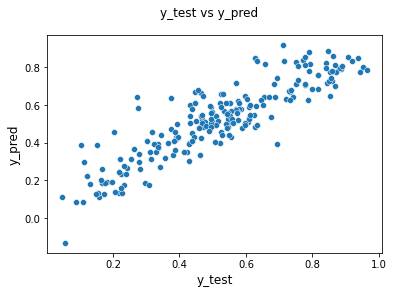

In [92]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.scatterplot(x=y_test,y=y_test_pred)

fig.suptitle('y_test vs y_pred', fontsize = 12)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel('y_pred', fontsize = 12)   

We can see that the equation of our best fitted line is:

$ cnt = 0.2328  \times  yr - 0.0992  \times  holiday + 0.5480 \times temp - 0.1533 \times windspeed + 0.0868 \times season_summer + 0.1306 \times season_winter + 0.1011 \times mnth_Sep - 0.0797 \times W_Mist - 0.2838 \times W_LightRain +  0.1264 $
